In [26]:
######### Seaborn 
# Matplotlib is not designed for use with Pandas DataFrames. 
# In order to visualize data from a Pandas DataFrame, you must extract each Series and often concatenate them together into 
# the right format. 
# It would be nicer to have a plotting library that can intelligently use the DataFrame labels in a plot
#######################################

In [27]:
import numpy as np
import pandas as pd

In [28]:
### matplotlib vs, seaborn on a simple plot example
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

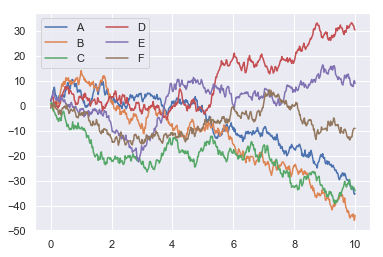

In [29]:
# matplot
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='best')
plt.show()

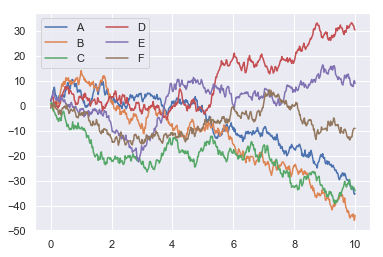

In [30]:
#seaborn style
import seaborn as sns
sns.set()
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='best')

In [31]:
### Histogram -- seaborn uses a a smooth estimate of the distribution 
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
data.shape
data.head()

,x,y
0,0.752237,1.473720
1,5.415297,2.920553
2,4.651773,1.915570
3,-0.930816,-0.946273
4,1.619321,3.239765


C:\Users\sara\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


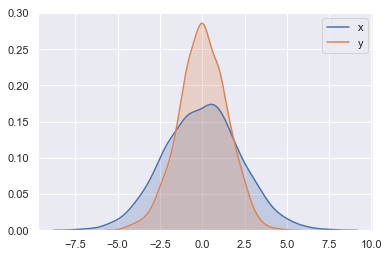

In [7]:
# kde (kernel density estimation)
for col in data:
    sns.kdeplot(data[col], shade=True)
#sns.kdeplot(data)

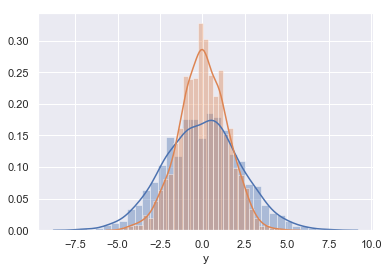

In [8]:
# distplot
sns.distplot(data['x'])
sns.distplot(data['y']);

C:\Users\sara\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


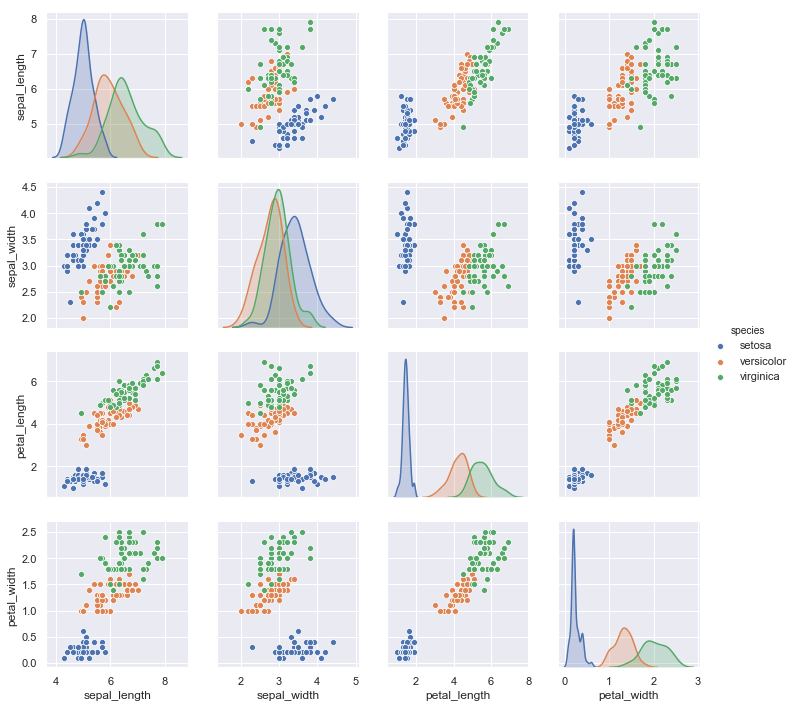

In [33]:
### Pair plots --- exploring correlations between multidimensional data, when you’d like to plot all pairs of values against each other.

# load the irris dataset
iris = sns.load_dataset('iris')
#iris.head()
sns.pairplot(iris, hue='species', size=2.5)

In [34]:
# 
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


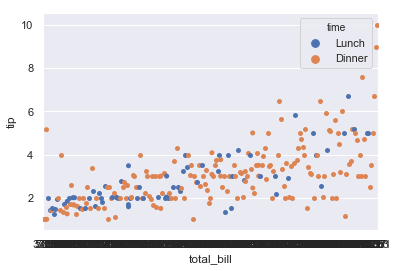

In [41]:
# scatter plot
# show total bill value to the tip value
#sns.scatterplot(x="total_bill", y="tip", hue="time", data=tips)

# Often multiple datapoints have exactly the same X and Y values
# To avoid this, jitter the points slightly so you can visually see them.
sns.stripplot(x="total_bill", y="tip", hue="time", data=tips)

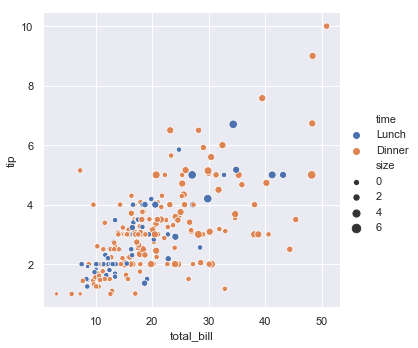

In [36]:
# changing circle sizes
sns.relplot(x="total_bill", y="tip", hue="time", p, data=tips)
#sns.relplot(x="total_bill", y="tip", hue="time", size="size" , sizes=(40, 400), alpha=.8, height=6, data=tips)


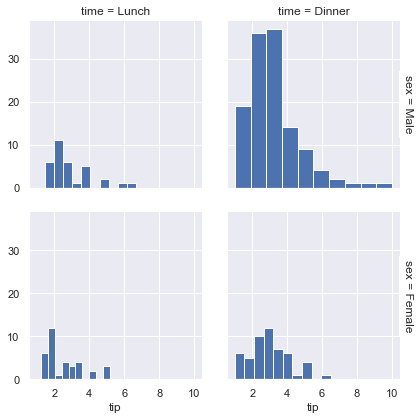

In [37]:
### FacetGrid -- the histogram of subsets
# Example: show the amount that restaurant staff receive in tips based on various indicator data
grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip')

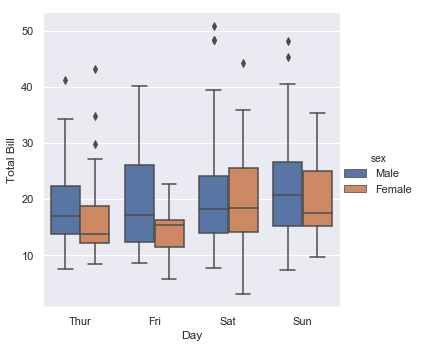

In [38]:
# catplots -- categorial for the same use as above
graph = sns.catplot(x='day', y='total_bill', hue='sex', data=tips, kind='box') # kind may be 'bar', 'point', 'strip' see help
graph.set_axis_labels('Day', 'Total Bill');
#help(sns.catplot)

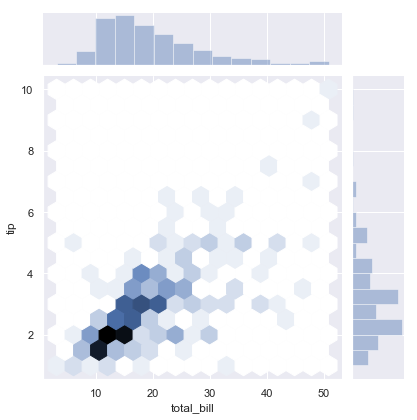

In [39]:
### Joint plots --- correlation between sets of data
# show the relation between 'tip' value and 'total bill' value
sns.jointplot("total_bill", "tip", data=tips, kind='hex') # notice it is low correlation

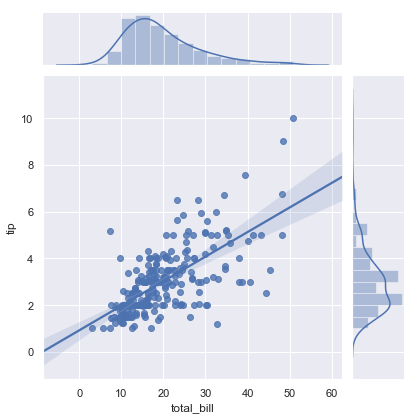

In [16]:
# add the 'reg' kind to show a regression line, which can be used to estimate one variable based on the other
sns.jointplot("total_bill", "tip", data=tips, kind='reg')

In [17]:
### Bar Plots
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


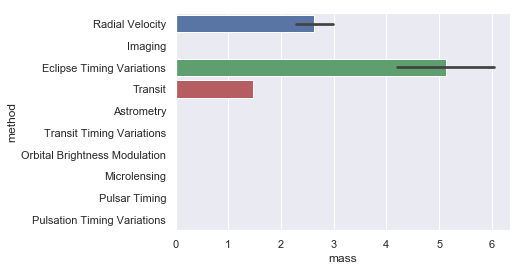

In [18]:
# horizontal barplot
sns.barplot(x="mass", y="method", data= planets)

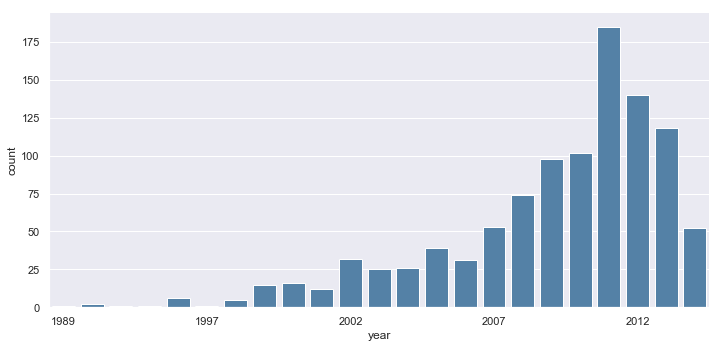

In [19]:
# show number of discovered planets by year
g = sns.catplot('year', data=planets, aspect=2, kind='count', color='steelblue')
g.set_xticklabels(step=5)
#help(sns.catplot)

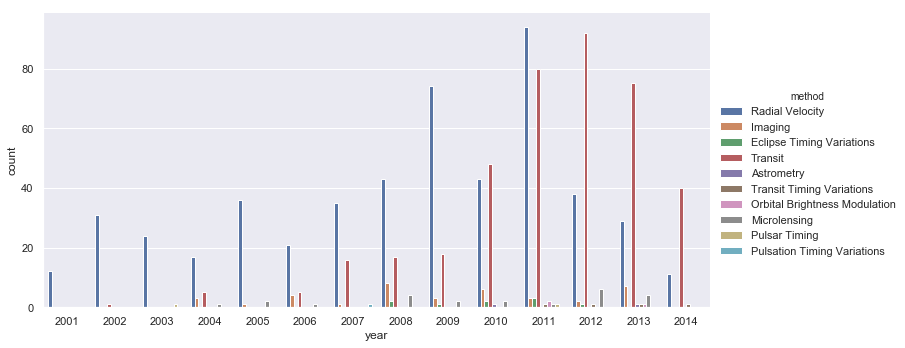

In [20]:
# grouped bar plot 
#show number of discovered planets in each year categorized by method
g = sns.catplot('year', data=planets, aspect=2, kind='count', hue='method', order=range(2001, 2015))

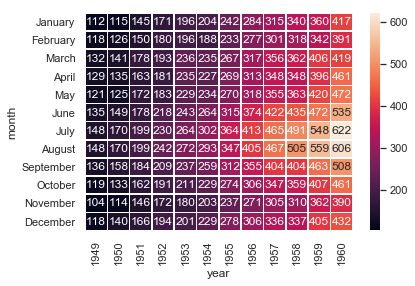

In [43]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
#sns.heatmap(flights)
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5) # Annotate each cell with the numeric value using integer formatting